In [138]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and split dataset

In [12]:
boston = load_boston()
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [23]:
bos_X = pd.DataFrame(boston.data)
bos_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos_y = pd.DataFrame(boston.target)
print(bos_y.head())

      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(bos_X, bos_y, test_size=0.2)

In [6]:
#Check splitting
print(bos_X.shape[0])
print(float(X_train.shape[0]) / float(bos_X.shape[0]))
print(float(X_test.shape[0]) / float(bos_X.shape[0]))

506
0.7984189723320159
0.2015810276679842


## Linear regression

In [10]:
regr = LinearRegression()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

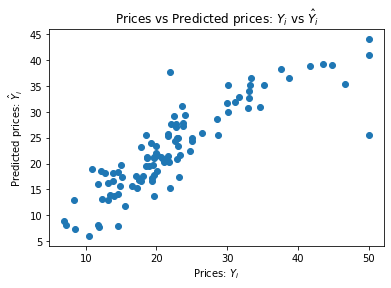

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### In ideal scatter plot we should see direct line y = x 

## Mean Squared Error

In [17]:
error = np.mean((y_pred - y_test) ** 2)
#print("Residual sum of squares: {}".format(error))
print(error)

0    21.320577
dtype: float64


# Second attempt

In [25]:
scaler = StandardScaler()
bos_X_scaled = pd.DataFrame(scaler.fit_transform(bos_X))

In [26]:
bos_X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [29]:
polynomial_features= PolynomialFeatures(degree=2)

In [31]:
bos_X_poly = polynomial_features.fit_transform(bos_X_scaled)

In [32]:
type(bos_X_poly)

numpy.ndarray

In [36]:
X_train, X_test, y_train, y_test = train_test_split(bos_X_poly, bos_y, test_size=0.2)

In [37]:
regr = LinearRegression()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

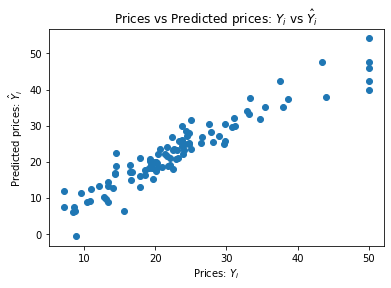

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [39]:
error = np.mean((y_pred - y_test) ** 2)
#print("Residual sum of squares: {}".format(error))
print(error)

0    10.24009
dtype: float64


## Lasso

In [74]:
regr_lasso_0_1 = Lasso(alpha=0.1)
regr_lasso_1_0 = Lasso(alpha=1.0)
regr_lasso_5 = Lasso(alpha=5.0)

In [65]:
regr_lasso_0_1.fit(X_train, y_train)
y_pred = regr_lasso_0_1.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: Lasso 0.1')

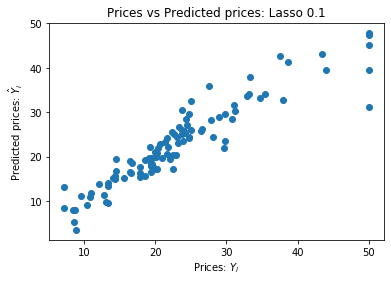

In [66]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Lasso 0.1")

In [67]:
regr_lasso_1_0.fit(X_train, y_train)
y_pred = regr_lasso_1_0.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: Lasso 1.0')

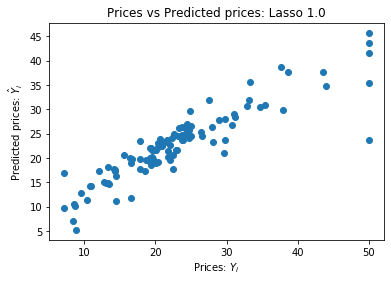

In [68]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Lasso 1.0")

In [75]:
regr_lasso_5.fit(X_train, y_train)
y_pred = regr_lasso_5.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: Lasso 5.0')

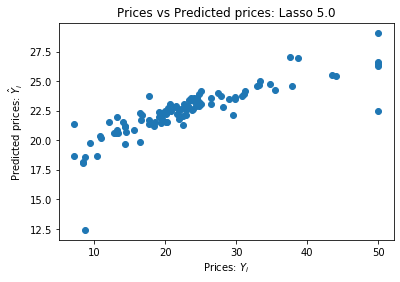

In [76]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Lasso 5.0")

## Ridge

In [96]:
regr_ridge_0_1 = Ridge(alpha=0.01)
regr_ridge_1_0 = Ridge(alpha=1.0)
regr_ridge_5 = Ridge(alpha=10.0)

In [97]:
regr_ridge_0_1.fit(X_train, y_train)
y_pred = regr_ridge_0_1.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: Ridge 0.01')

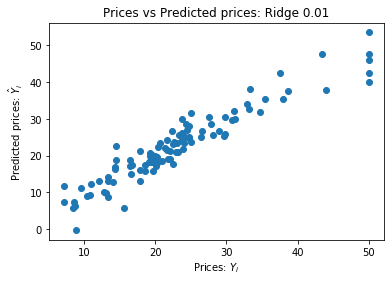

In [98]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Ridge 0.01")

In [99]:
regr_ridge_1_0.fit(X_train, y_train)
y_pred = regr_ridge_1_0.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: Ridge 1.0')

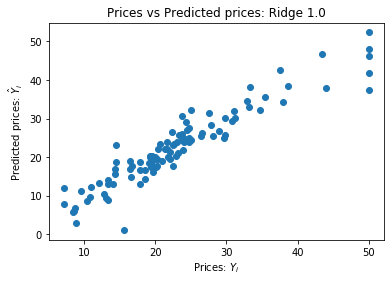

In [100]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Ridge 1.0")

In [101]:
regr_ridge_5.fit(X_train, y_train)
y_pred = regr_ridge_5.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: Ridge 10.0')

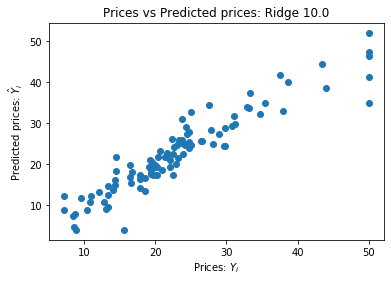

In [102]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Ridge 10.0")

# Regularization for logistic regression

In [193]:
from sklearn.datasets import load_breast_cancer

In [194]:
d_cancer = load_breast_cancer(as_frame=True)
cancer_X = pd.DataFrame(d_cancer.data, index=None)
cancer_X.head()
#cancer_X.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### There are no missing cells 

In [195]:
cancer_y = pd.DataFrame(d_cancer.target)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.2)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [218]:
log_regr = LogisticRegression(penalty='l2', C=1.0).fit(X_train, y_train)
# l2 penalty set because I got following error:
# "Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.""
y_pred = log_regr.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)

C:\Users\rafal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rafal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
